In [33]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import yodiipy
import numpy
import pylab as plt
import math

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



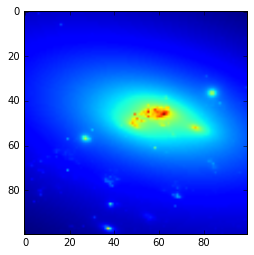

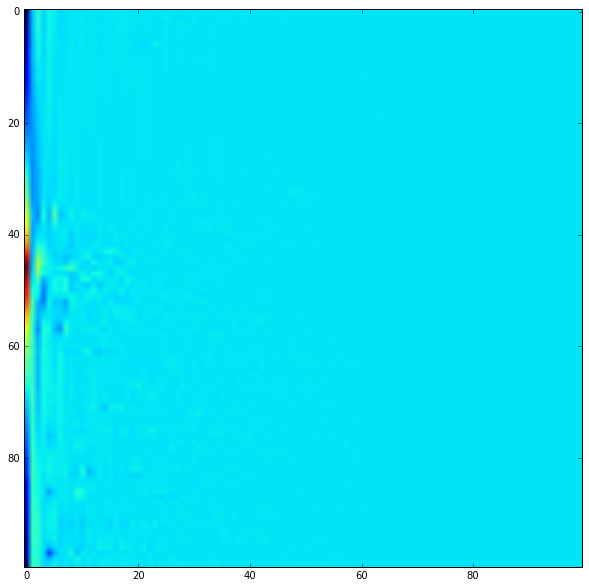

In [35]:
# load some etas data to play with.
#XYZ = []
fl_nm = 'data/nepal_etas_20150507_b.xyz'
#fl_nm = 'data/global_xyz_20151129.xyz'
with open(fl_nm, 'r') as f:
    XYZ = [[float(x) for x in rw[:-1].split()] for rw in f if rw[0] not in ('#', ' ', '\t', '\n')]
#
X_s = sorted(list(set([x for x,y,z in XYZ])))
Y_s = sorted(list(set([y for x,y,z, in XYZ])))
#
Xs,Ys,Zs = [numpy.array(list(x)) for x in zip(*XYZ)]
#
Zs = numpy.log10(Zs)
Zs.shape=(len(X_s), len(Y_s))
#
pca = PCA(n_components=None)
X_r = pca.fit(Zs).transform(Zs)
#
lda = LinearDiscriminantAnalysis(n_components=None)
#X_r2 = lda.fit(X, y).transform(Zs)
#
plt.figure()
plt.imshow(Zs)
#
plt.figure(figsize=(10,10))
plt.imshow(X_r)


In [36]:
import yodiipy.pca_tools as ypt


In [41]:
vals, vecs = ypt.yoda_pca(Zs)

In [42]:
len(vecs), len(vals)
print(vals[0:5])
Zs2 = Zs.copy()


[ 11.48721887   0.56949311   0.41412018   0.10683453   0.08465176]


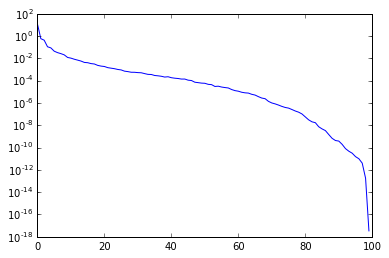

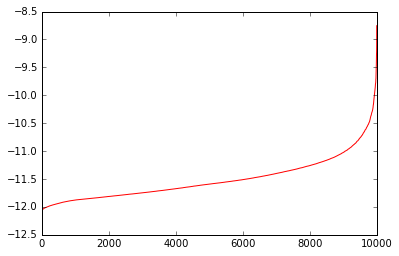

In [39]:
plt.figure()
plt.clf()
ax=plt.gca()
#
ax.set_yscale('log')
ax.plot(vecs)
#ax2 = ax.twinx()
plt.figure()
plt.clf()
ax2=plt.gca()
sh=Zs2.shape
Zs2.shape=((Zs2.size,))
ax2.plot(sorted(Zs2), color='r')